In [6]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

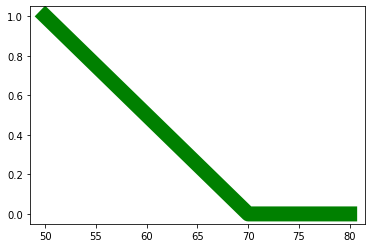

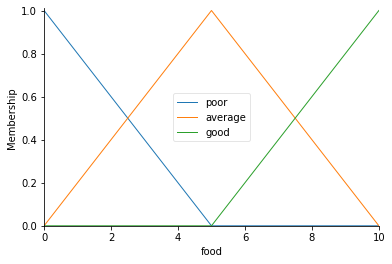

In [8]:
from skfuzzy import control as ctrl
x = np.arange(50,81,1)
slow = fuzz.trimf(x,[50, 50, 70])
plt.figure()
plt.plot(x,slow,'g', linewidth=15,label = 'slow')   
food = ctrl.Antecedent(np.arange(0, 11, 1),'food')
service = ctrl.Antecedent(np.arange(0, 11, 1),'service')
tip = ctrl.Consequent(np.arange(10, 31, 1),'tip')
food['poor'] = fuzz.trimf(food.universe,[0,0,5])
food['average'] = fuzz.trimf(food.universe,[0,5,10])
food['good'] = fuzz.trimf(food.universe,[5,10,10])
food.view()


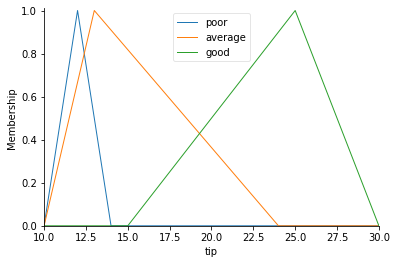

In [9]:
tip['poor'] = fuzz.trimf(tip.universe,[10,12,14])
tip['average'] = fuzz.trimf(tip.universe,[10,13,24])
tip['good'] = fuzz.trimf(tip.universe,[15,25,30])
tip.view()


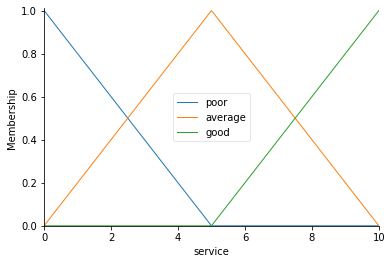

In [10]:
service['poor'] = fuzz.trimf(service.universe,[0,0,5])
service['average'] = fuzz.trimf(service.universe,[0,5,10])
service['good'] = fuzz.trimf(service.universe,[5,10,10])
service.view()


13.223119397633551


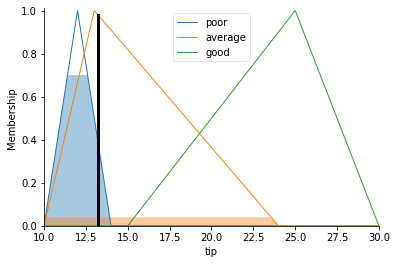

In [13]:
Rule1 = ctrl.Rule(food['poor'] & service['poor'],tip['poor'])
Rule2 = ctrl.Rule(food['poor'] & service['average'],tip['average'])
Rule3 = ctrl.Rule(food['poor'] & service['good'],tip['average'])
Rule4 = ctrl.Rule(food['average'] & service['poor'],tip['poor'])
Rule5 = ctrl.Rule(food['average'] & service['average'],tip['average'])
Rule6 = ctrl.Rule(food['average'] & service['good'],tip['poor'])
Rule7 = ctrl.Rule(food['good'] & service['poor'],tip['poor'])
Rule8 = ctrl.Rule(food['good'] & service['average'],tip['average'])
Rule9 = ctrl.Rule(food['good'] & service['good'],tip['poor'])
tipping_ctrl = ctrl.ControlSystem([Rule1, Rule2, Rule3, Rule4, Rule5, Rule6, Rule7, Rule8, Rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food'] = 6.5
tipping.input['service'] = 9.8
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)